In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd



In [ ]:
data_dir="/content/drive/MyDrive/braintumour"

In [ ]:
train_data=ImageDataGenerator(rescale=1./255,validation_split=0.2)

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
train_gen=train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode='binary',subset='training')

Found 161 images belonging to 2 classes.


In [ ]:
val_gen=train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode='binary',subset='validation')

Found 39 images belonging to 2 classes.


In [ ]:
model=keras.Sequential([ layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(32,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(32,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(128,activation='relu'),
                        layers.Dense(1,activation='sigmoid')






                         ])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,183,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,198,337 (4.57 MB)

 Trainable params: 1,198,337 (4.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_gen,epochs=1,validation_data=val_gen,batch_size=32)

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 899ms/step - accuracy: 0.8418 - loss: 0.4670 - val_accuracy: 0.7949 - val_loss: 0.5141


In [ ]:
model.save('/content/drive/MyDrive/braintumour/brain.h5')

NameError: name 'model' is not defined

In [ ]:
model=load_model('/content/drive/MyDrive/braintumour/brain.h5')
print('model loaded')

model loaded


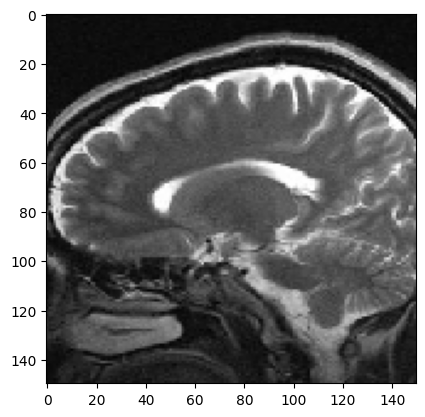

In [ ]:
test_image='/content/drive/MyDrive/braintumour/negative/Te-no_0013.jpg'
img=image.load_img(test_image,target_size=(150,150))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255


In [ ]:
predict_value=model.predict(img_array)

print(predict_value)

if(predict_value>0.5):
  print('positive')
else:
  print('negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0.00081689]]
negative
